In [34]:
import pandas as pd

In [35]:
diabetes = pd.read_csv('../../CSVs/diabetic_dropped.csv')
diabetes.head()

Unnamed: 0  patient_nbr             race  gender      age  \
0           0      8222157        Caucasian  Female   [0-10)   
1           1     55629189        Caucasian  Female  [10-20)   
2           2     86047875  AfricanAmerican  Female  [20-30)   
3           3     82442376        Caucasian    Male  [30-40)   
4           4     42519267        Caucasian    Male  [40-50)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  num_lab_procedures  ...  miglitol  troglitazone  \
0                 1                  41  ...        No            No   
1                 3                  59  ...        No            No   
2                 2                  11  ...        No            No   
3                 2                  44  ...        No            No   
4                 1                  51  ...        No            No   

   tolazamide  insulin  glyburide-metformin glipizide-metformin  \
0          No       No                   No                  No   
1          No       Up                   No                  No   
2          No       No                   No                  No   
3          No       Up                   No                  No   
4          No   Steady                   No                  No   

  glimepiride-pioglitazone change  diabetesMed readmitted  
0                       No     No           No          0  
1                       No     Ch          Yes          0  
2                       No     No          Yes          0  
3                       No     Ch          Yes          0  
4                       No     Ch          Yes          0  

[5 rows x 43 columns]

In [3]:
# Cross table of patients who were readmitted to the hospital by race
pd.crosstab(diabetes['race'], diabetes['readmitted'], normalize='index') * 100

readmitted               0          1
race                                 
?                91.728993   8.271007
AfricanAmerican  88.781884  11.218116
Asian            89.859594  10.140406
Caucasian        88.709444  11.290556
Hispanic         89.592538  10.407462
Other            90.371846   9.628154

In [4]:
# stacked bar graph of race and readmittance
import plotly.express as px
filtered_diabetes = diabetes[diabetes['race'] != '?']
px.histogram(filtered_diabetes, x = 'race', color='readmitted', barmode='stack', barnorm='percent', title='Readmission Rate by Race')

In [5]:
# Is there a significant trend between race and readmittance?
from scipy.stats import chi2_contingency

# Create contingency table
contingency = pd.crosstab(filtered_diabetes['race'], filtered_diabetes['readmitted'])

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 6.3051696776377195
P-value: 0.17748772174247662


In [ ]:
# stacked bar graph of readmittance by age
age = diabetes.copy()
fig = px.histogram(
    diabetes, 
    x = 'age', 
    color='readmitted',
    category_orders={'readmitted': [1,0],\
                      'age': ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']}, 
    barmode='stack', 
    color_discrete_map={1:'#bd4228', 0:'#2880bd'},
    title='Readmission Rate by Age'
)
fig.show()

In [38]:
fig.write_html('age_readmission.html')

In [44]:
# testing if there is a significant trend of readmittance by age
age_contingency = pd.crosstab(diabetes['age'], diabetes['readmitted'])
chi2, p, dof, expected = chi2_contingency(age_contingency)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 116.60891071617705
P-value: 6.5979228098776445e-21


In [46]:
diabetes.shape[0]

101766

In [9]:
# readmittance by gender
filtered_gender = diabetes[diabetes['gender'] != 'Unknown/Invalid']
px.histogram(filtered_gender, x='gender', color='readmitted', barmode='stack', barnorm='percent',\
              title='Readmission Rate by Gender')

In [10]:
# testing if there is tha significant trend of readmittance by gender
gender_contingency = pd.crosstab(filtered_gender['gender'], filtered_gender['readmitted'])
chi2, p, dof, expected = chi2_contingency(gender_contingency)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 0.8419460932978957
P-value: 0.35884077972245254


In [11]:
# testing if there is a significance in readmittance by medication
# choose insulin because it has the smallest p-value and is the most significant
meds = ['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone']
med_p = {}
for med in meds:
    table = pd.crosstab(diabetes[med], diabetes['readmitted'])
    chi2, p, _, _ = chi2_contingency(table)
    med_p[med] = p
pd.DataFrame.from_dict(med_p, orient='index', columns=['p-value']).sort_values(by='p-value')

p-value
insulin                   3.981889e-41
metformin                 1.085303e-12
repaglinide               7.286841e-03
glipizide                 9.272622e-03
glimepiride               7.348629e-02
pioglitazone              9.385151e-02
rosiglitazone             1.420400e-01
miglitol                  1.618968e-01
glyburide                 2.014449e-01
acarbose                  2.190269e-01
chlorpropamide            4.333180e-01
tolbutamide               4.798639e-01
nateglinide               7.028431e-01
glyburide-metformin       7.555789e-01
tolazamide                7.655096e-01
glipizide-metformin       1.000000e+00
troglitazone              1.000000e+00
acetohexamide             1.000000e+00
glimepiride-pioglitazone  1.000000e+00

In [12]:
diabetes['insulin'].unique()

array(['No', 'Up', 'Steady', 'Down'], dtype=object)

In [13]:
# split insulin into 3 different columns so that we have binary values
diabetes['insulin'] = pd.Categorical(diabetes['insulin'], categories=['No', 'Steady', 'Up', 'Down'])
insulin_dummies = pd.get_dummies(diabetes['insulin'], prefix='insulin', drop_first=True)
insulin_dummies

insulin_Steady  insulin_Up  insulin_Down
0                False       False         False
1                False        True         False
2                False       False         False
3                False        True         False
4                 True       False         False
...                ...         ...           ...
101761           False       False          True
101762            True       False         False
101763           False       False          True
101764           False        True         False
101765           False       False         False

[101766 rows x 3 columns]

In [14]:
# convert to floats; add an intercept of 1
X = pd.concat([insulin_dummies], axis=1)
X['intercept'] = 1
X = X.astype('float')
X

insulin_Steady  insulin_Up  insulin_Down  intercept
0                  0.0         0.0           0.0        1.0
1                  0.0         1.0           0.0        1.0
2                  0.0         0.0           0.0        1.0
3                  0.0         1.0           0.0        1.0
4                  1.0         0.0           0.0        1.0
...                ...         ...           ...        ...
101761             0.0         0.0           1.0        1.0
101762             1.0         0.0           0.0        1.0
101763             0.0         0.0           1.0        1.0
101764             0.0         1.0           0.0        1.0
101765             0.0         0.0           0.0        1.0

[101766 rows x 4 columns]

In [15]:
import statsmodels.api as sm
model = sm.Logit(diabetes['readmitted'], X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.348936
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:               101766
Model:                          Logit   Df Residuals:                   101762
Method:                           MLE   Df Model:                            3
Date:                Sun, 27 Jul 2025   Pseudo R-squ.:                0.002600
Time:                        00:35:04   Log-Likelihood:                -35510.
converged:                       True   LL-Null:                       -35602.
Covariance Type:            nonrobust   LLR p-value:                 6.817e-40
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
insulin_Steady     0.1154      0.024      4.870      0.000       0.069       0.162
insulin_Up         0.2913      0.032      9.140      0.000       0.229       0.354
insulin_Down       0.3693      0.030     12.189      0.000       0.310       0.429
intercept         -2.1931      0.015   -143.452      0.000      -2.223      -2.163
==================================================================================
"""

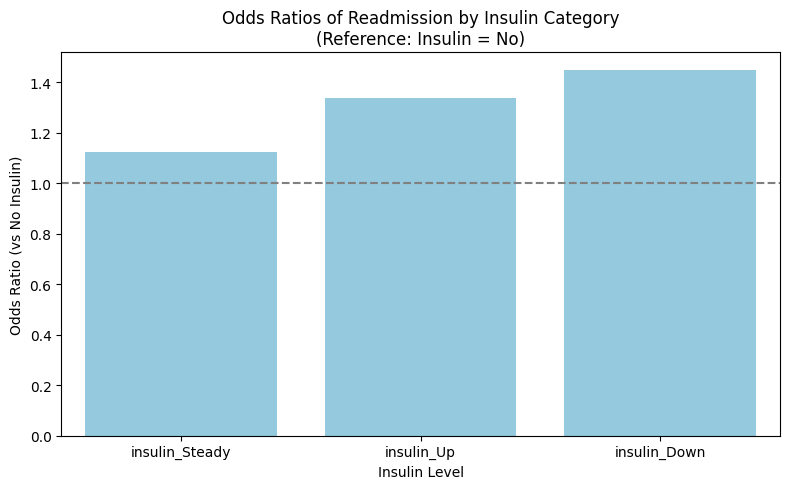

In [16]:
# Create bar graph representing the odd ratios
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Coefficients from model
coefs = {'insulin_Steady': 0.1154, 'insulin_Up': 0.2913, 'insulin_Down': 0.3693}
odds_ratios = {k: np.exp(v) for k, v in coefs.items()}

# Prepare DataFrame
odds_df = pd.DataFrame({
    'Insulin Category': list(odds_ratios.keys()),
    'Odds Ratio': list(odds_ratios.values())
})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=odds_df, x='Insulin Category', y='Odds Ratio', color='skyblue')
plt.axhline(1, linestyle='--', color='gray')
plt.title('Odds Ratios of Readmission by Insulin Category\n(Reference: Insulin = No)')
plt.ylabel('Odds Ratio (vs No Insulin)')
plt.xlabel('Insulin Level')
plt.tight_layout()
plt.savefig('insulin_odds_ratios.png', bbox_inches='tight')
plt.show()


In [17]:
diabetes = diabetes.drop(columns={'Unnamed: 0'})

In [18]:
filtered_glu = diabetes[~diabetes['max_glu_serum'].isna()]

In [19]:
# significance between max glu serum and readmittance?
contingency = pd.crosstab(filtered_glu['max_glu_serum'], filtered_glu['readmitted'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi2 = {chi2}, p-value = {p}")

Chi2 = 6.892902081752553, p-value = 0.03185850050054759


In [20]:
# stacked bar plot between max glu serum and readmittance
max_glu_fig = px.histogram(filtered_glu, x='max_glu_serum', color='readmitted', barmode='stack', barnorm='percent',\
              title='Readmission Rate by Glucose Level', 
              category_orders={'readmitted':[1,0],
                               'max_glu_serum': ['Norm', '>200', '>300']}, 
              color_discrete_map={1:'#bd4228', 0:'#2880bd'})
max_glu_fig.add_hline(
    y=11.36,
    line_dash='dash',
    line_color='yellow',
    line_width=2
)

In [21]:
max_glu_fig.write_html('max_glu_fig.html')

In [22]:
diabetes['discharge_disposition_id'].value_counts(normalize=True).iloc[0:12]

discharge_disposition_id
1     0.591887
3     0.137118
6     0.126781
18    0.036269
2     0.020911
22    0.019584
11    0.016135
5     0.011635
25    0.009718
4     0.008009
7     0.006122
23    0.004049
Name: proportion, dtype: float64

In [23]:
discharge_mapping = {
    1: 'Discharged to home',
    3: 'Discharged/transferred to SNF',
    6: 'Discharged/transferred to home with home health service',
    2: 'Discharged/transferred to another short term hospital',
    22: 'Discharged/transferred to another rehab fac including rehab units of a hospital.',
    11: 'Expired',
    5: 'Discharged/transferred to another type of inpatient care institution',
    25: 'Not Mapped',
    4: 'Discharged/transferred to ICF',
    7: 'Left AMA',
    23: 'Discharged/transferred to a long term care hospital.'
}

In [24]:
discharge = pd.DataFrame(diabetes['discharge_disposition_id'].value_counts(normalize=True).iloc[0:12]).reset_index()
discharge['discharge label'] = discharge['discharge_disposition_id'].map(discharge_mapping)
discharge = discharge[(~discharge['discharge label'].isna()) & (discharge['discharge label'] != 'Not Mapped')]
discharge

discharge_disposition_id  proportion  \
0                          1    0.591887   
1                          3    0.137118   
2                          6    0.126781   
4                          2    0.020911   
5                         22    0.019584   
6                         11    0.016135   
7                          5    0.011635   
9                          4    0.008009   
10                         7    0.006122   
11                        23    0.004049   

                                      discharge label  
0                                  Discharged to home  
1                       Discharged/transferred to SNF  
2   Discharged/transferred to home with home healt...  
4   Discharged/transferred to another short term h...  
5   Discharged/transferred to another rehab fac in...  
6                                             Expired  
7   Discharged/transferred to another type of inpa...  
9                       Discharged/transferred to ICF  
10                                           Left AMA  
11  Discharged/transferred to a long term care hos...

In [25]:
# bar graph of top 10 most common discharge destinations
discharge['discharge_disposition_id'] = discharge['discharge_disposition_id'].astype(str)

fig = px.bar(discharge, 
             x='discharge_disposition_id', 
             y = 'proportion',
             labels={'discharge_disposition_id': 'Patient Discharge Destinations'},
             title='Distribution of Patient Discharge Destinations')
fig.update_xaxes(tickvals=[1,3,6,2,22,11,5,4,7,23],
                 ticktext=['Home', 'Skilled Nursing Facility', 'Home Health Service', \
                           'Short Term Hospital', 'Rehab Facility', 'Expired',\
                            'Inpatient Care Institution', 'Intermediate Care Facility',\
                            'Left Against Medical Advice', 'Long-Term Care Hospital'])
fig.update_layout(xaxis_tickangle=-45, bargap=0.1)
fig.show()
# fig.update_traces(textposition='outside')


In [26]:
fig.write_html('patient_discharge.html')

In [27]:
diabetes['discharge_disposition_id'].dtypes

dtype('int64')

In [28]:
# significance between discharge location & readmittance
discharge_filtered = diabetes[(diabetes['discharge_disposition_id']!=18) & (diabetes['discharge_disposition_id']!=45) & (diabetes['discharge_disposition_id']!=26)]
contingency = pd.crosstab(discharge_filtered['discharge_disposition_id'], discharge_filtered['readmitted'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi2 = {chi2}, p-value = {p}")

Chi2 = 1582.2520942358146, p-value = 0.0


In [29]:
import plotly.express as px
fig = px.histogram(
    discharge_filtered,
    x='discharge_disposition_id',
    color='readmitted',
    barmode='stack',
    barnorm='percent',
    title='Readmission Rate by Discharge Disposition'
)
fig.show()


In [30]:
(len(diabetes[(diabetes['discharge_disposition_id']==1) & (diabetes['readmitted']==1)])) / len(diabetes[(diabetes['discharge_disposition_id']==1)])

0.09300395125676528

In [31]:
(len(diabetes[(diabetes['discharge_disposition_id']==3) & (diabetes['readmitted']==1)])) / len(diabetes[(diabetes['discharge_disposition_id']==3)])

0.14662462376379531

In [32]:
diabetes.iloc[24886]

patient_nbr                     45144
race                        Caucasian
gender                           Male
age                           [10-20)
admission_type_id                   1
discharge_disposition_id            1
admission_source_id                 7
time_in_hospital                   13
num_lab_procedures                 38
num_procedures                      1
num_medications                    20
number_outpatient                   0
number_emergency                    0
number_inpatient                    3
diag_1                            482
diag_2                            277
diag_3                            493
number_diagnoses                    5
max_glu_serum                     NaN
A1Cresult                         NaN
metformin                          No
repaglinide                        No
nateglinide                        No
chlorpropamide                     No
glimepiride                        No
acetohexamide                      No
glipizide   